<a href="https://colab.research.google.com/github/vgudur/HouseSalesAnalytics/blob/main/Troy_House_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Residental and Condo Sales of Troy, MI
<p><a href="https://troymi.gov/departments/assessing/sales_and_studies.php/">Troy RealEstate Sales analysis</a></p>


### Step1 - Load the data

In [ ]:
db_file_Col_Names = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']

dataurl = loc_bank
## Read CSV with predefined column list
## Skip the headrow
## Read CSV without index column
df_base = pd.read_csv(dataurl, names = db_file_Col_Names, skiprows=1, na_values='?', sep =';', index_col=False)

house_sales = pd.read_csv('https://elephantscale-public.s3.amazonaws.com/data/house-prices/house-sales-full.csv')
house_sales.head()


### Step2 - Explore the data

In [ ]:
num_Features,  cat_Features = PreProcessing_Step1(df_base, bprintdebug=False)

##### Drop missing values

In [ ]:
## drop missing records from both datasets
# making new data frame with dropped NA values  
df_bank = df_base.dropna(axis = 0, how ='any')


print("\nCleaning NA values in training set \n\tLength before: {0} Length After : {1}".format( len(df_base), len(df_bank)    )    ) 
print("\n\tNumber of rows with at least 1 NA value: ", ( len(df_base) - len(df_bank)  )) 



Cleaning NA values in training set 
	Length before: 4521 Length After : 4521

	Number of rows with at least 1 NA value:  0


###Step3 - Encoding

We need to encode  these category values to numerical values

In [ ]:
# Encoding above ordinal data using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
ordinalencoder = OrdinalEncoder()

df_bank["loan_index"] = df_bank["loan"].apply(lambda x:0 if x.strip() =='no' else 1)
print ( "Unique values in loan_index feature are " , df_bank['loan_index'].unique() )


df_bank["housing_index"] = df_bank["housing"].apply(lambda x:0 if x.strip() =='no' else 1)
print ( "Unique values in housing_index feature are " , df_bank['housing_index'].unique() )

df_bank["default_index"] = df_bank["default"].apply(lambda x:0 if x.strip() =='no' else 1)
print ( "Unique values in default_index feature are " , df_bank['default_index'].unique() )

df_bank["y_index"] = df_bank["y"].apply(lambda x:0 if x.strip() =='no' else 1)
print ( "Unique values in y_index feature are " , df_bank['y_index'].unique() )

Unique values in loan_index feature are  [0 1]
Unique values in housing_index feature are  [0 1]
Unique values in default_index feature are  [0 1]
Unique values in y_index feature are  [0 1]


### Step4 - Feature Engineering

In [ ]:
num_features = df_bank.select_dtypes([np.number]).columns.tolist()
#defin features: text and predict output: Category
feature_labels = num_features

## drop Patient_ID and target variable from feature_lables
if ( feature_labels.count('Patient_ID') >0  ):
  feature_labels.remove('Patient_ID')
if ( feature_labels.count('y_index') >0  ):
  feature_labels.remove('y_index')
target_variable = ['y_index']


##df_filtered = pd.DataFrame ( df_HCV, columns=list(feature_labels))
##df_New = pd.DataFrame ( dset, columns=list(num_features))

X = pd.DataFrame ( df_bank, columns=list(feature_labels))
y = pd.DataFrame ( df_bank, columns=list(target_variable))
X, y


(      age  balance  day  duration  campaign  pdays  previous  loan_index  \
 0      30     1787   19        79         1     -1         0           0   
 1      33     4789   11       220         1    339         4           1   
 2      35     1350   16       185         1    330         1           0   
 3      30     1476    3       199         4     -1         0           1   
 4      59        0    5       226         1     -1         0           0   
 ...   ...      ...  ...       ...       ...    ...       ...         ...   
 4516   33     -333   30       329         5     -1         0           0   
 4517   57    -3313    9       153         1     -1         0           1   
 4518   57      295   19       151        11     -1         0           0   
 4519   28     1137    6       129         4    211         3           0   
 4520   44     1136    3       345         2    249         7           1   
 
       housing_index  default_index  
 0                 0              0 

### Step5 - Run DT Model

features ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'loan_index', 'housing_index', 'default_index'] 
target : ['y_index']
Size of 
x_train :(3616, 10)  y_train :(3616, 1) 
x_test :(905, 10)  y_test :(905, 1)
Running ML Model 



		 
 [[786  21]
 [ 73  25]]


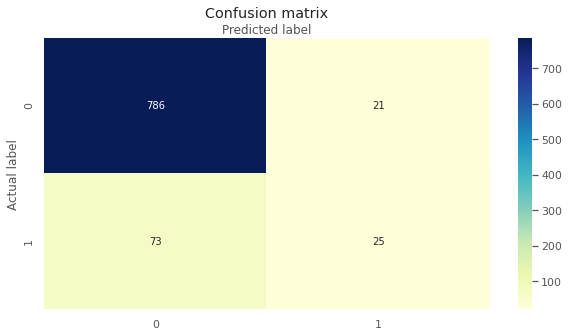

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.54      0.26      0.35        98

    accuracy                           0.90       905
   macro avg       0.73      0.61      0.65       905
weighted avg       0.87      0.90      0.88       905



('RFC', 0.9615597345132744, 0.8961325966850828)

In [ ]:
print ( "features {0} \ntarget : {1}".format( feature_labels, target_variable))

x_train , x_test , y_train , y_test = train_test_split(X , y, test_size = 0.20, random_state = 42)
print( "Size of \nx_train :{}  y_train :{} \nx_test :{}  y_test :{}".format(  x_train.shape ,  y_train.shape , x_test.shape, y_test.shape )  )
Run_Model (x_train , y_train , x_test , y_test ,  X.columns, modeltype='RFC', bDebugPrint= True )

### Step6 - Run cross validation

In [ ]:
## We can specify more than one metrics
scoring_metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
models = ['RFC']
cv_results = []
cv_stats  = []
for model_name in models:
  cv =  run_cross_Validation (X,y, scoring_metrics, model_name)
  cv_results.append(cv)
  cv_stats.append( [model_name 
                    , cv['test_accuracy'].mean(),  cv['train_accuracy'].mean()  
                    , cv['test_precision_weighted'].mean(),  cv['train_precision_weighted'].mean()  
                    , cv['test_recall_weighted'].mean(),  cv['train_recall_weighted'].mean()  
                    , cv['test_f1_weighted'].mean(),  cv['train_f1_weighted'].mean()  
                    , cv['score_time'].mean(),  cv['fit_time'].mean()
                                        ]  
                   )
print ("================= Cross validation of Algorithms - Stats ===================== \n\n")
df_cv = pd.DataFrame(cv_stats, 
                     columns = ['ModelName' , 'tst_Accuracy' , 'train_Accuracy',  'tst_pw' , 'train_pw' , 'tst_rw', 'train_rw' , 'tst_fw', 'train_fw' , 'score_time' , 'fit_time']
                     , index=None)
df_cv.head(20) 

================= Cross validation of Algorithms - Stats ===================== 




,ModelName,tst_Accuracy,train_Accuracy,tst_pw,train_pw,tst_rw,train_rw,tst_fw,train_fw,score_time,fit_time
0,RFC,0.88940,0.95933,0.86749,0.96089,0.88940,0.95933,0.87077,0.95550,0.12905,4.37916


#Ex-3 RF Regression

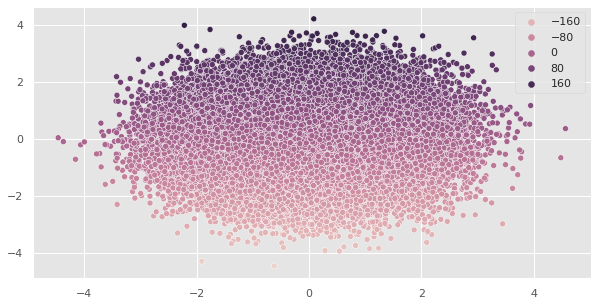

In [ ]:
from sklearn.datasets import make_regression
# Generate Clean data
X,y = make_regression(n_samples=100000, n_features=2, n_informative=1, noise=0.25, random_state=42)
f, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=(10,5))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1)


### Run the model

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X , y, test_size = 0.20, random_state = 42)
print( "Size of \nx_train :{}  y_train :{} \nx_test :{}  y_test :{}".format(  x_train.shape ,  y_train.shape , x_test.shape, y_test.shape )  )
Run_Model (x_train , y_train , x_test , y_test ,  [0,1], modeltype='RFR', bDebugPrint= True )

Size of 
x_train :(80000, 2)  y_train :(80000,) 
x_test :(20000, 2)  y_test :(20000,)
Running ML Model 


Mean Absolute Error: 0.22148100711181443
Mean Squared Error: 0.09878171279777366
Root Mean Squared Error: 0.3142955818934998


('RFR', 0.9999949467923255, 0.9999574359296127)

### Cross validation

## Pending

# EX-4 RF Regression ( Bikesharing data)

#### Step0  : Parse the zip files into local directory

In [ ]:
!wget -N https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!unzip -o Bike-Sharing-Dataset.zip -d ./Bike_Data/


--2020-11-21 05:36:27--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘Bike-Sharing-Dataset.zip’ not modified on server. Omitting download.

Archive:  Bike-Sharing-Dataset.zip
  inflating: ./Bike_Data/Readme.txt  
  inflating: ./Bike_Data/day.csv     
  inflating: ./Bike_Data/hour.csv    


In [ ]:
#Reading the csv files
loc_Bike_day = './Bike_Data/day.csv'
loc_Bike_hour = './Bike_Data/hour.csv'

###Step1: Load the data

In [ ]:
dataurl = loc_Bike_day
df_base = pd.read_csv(dataurl, na_values='?', sep =',', index_col=False)

###Step2 - Explore the data

In [ ]:
num_Features,  cat_Features = PreProcessing_Step1(df_base, bprintdebug=False)

#### Drop missing values

In [ ]:
## drop missing records from both datasets
# making new data frame with dropped NA values  
df_bike = df_base.dropna(axis = 0, how ='any')


print("\nCleaning NA values in training set \n\tLength before: {0} Length After : {1}".format( len(df_base), len(df_bike)    )    ) 
print("\n\tNumber of rows with at least 1 NA value: ", ( len(df_base) - len(df_bike)  )) 



Cleaning NA values in training set 
	Length before: 731 Length After : 731

	Number of rows with at least 1 NA value:  0


###Step3 - Encoding &  Normalization

In [ ]:
x_cols = list( df_bike.columns )
y_cols = ['cnt']
if ( x_cols.count('cnt')) >0:
  x_cols.remove('cnt')
if ( x_cols.count('casual')) >0:
  x_cols.remove('casual')
if ( x_cols.count('registered')) >0:
  x_cols.remove('registered') 

print ( "features {0} \ntarget : {1}".format( x_cols, y_cols))

features ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'] 
target : ['cnt']


#### Find Correlation between features and target


Finding correlation between features 

All feature correlation values 
             instant   season       yr     mnth  holiday  weekday  workingday  \
instant     1.00000  0.41222  0.86603  0.49670  0.01614 -0.00002    -0.00434   
season      0.41222  1.00000 -0.00184  0.83144 -0.01054 -0.00308     0.01248   
yr          0.86603 -0.00184  1.00000 -0.00179  0.00795 -0.00546    -0.00201   
mnth        0.49670  0.83144 -0.00179  1.00000  0.01919  0.00951    -0.00590   
holiday     0.01614 -0.01054  0.00795  0.01919  1.00000 -0.10196    -0.25302   
weekday    -0.00002 -0.00308 -0.00546  0.00951 -0.10196  1.00000     0.03579   
workingday -0.00434  0.01248 -0.00201 -0.00590 -0.25302  0.03579     1.00000   
weathersit -0.02148  0.01921 -0.04873  0.04353 -0.03463  0.03109     0.06120   
temp        0.15058  0.33431  0.04760  0.22021 -0.02856 -0.00017     0.05266   
atemp       0.15264  0.34288  0.04611  0.22746 -0.03251 -0.00754     0.05218   
hum         0.01637  0.20544 -0.11065  0.22220 

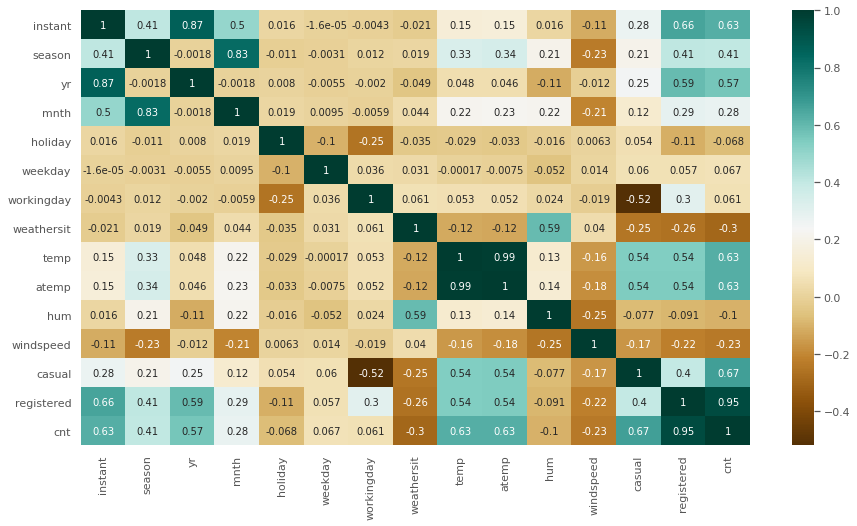

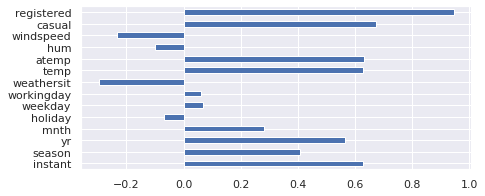

In [ ]:
show_Correlation_of_lables ( df_bike , y_cols[0])

#####Redefine feature columns

In [ ]:
x_cols
## correlation negatively impacted by holiday ,hum, weathersit , windspeed
## so we are going to drop it  from xcols

xcols_to_remove = ['instant','holiday', 'hum', 'dteday','windspeed', 'weathersit']

final_xcols = list(set(x_cols) - set(xcols_to_remove))
final_xcols
print("\nCleaning features \nbefore: {0} \nAfter : {1}".format( x_cols,final_xcols   )    ) 


Cleaning features 
before: ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'] 
After : ['yr', 'mnth', 'weekday', 'temp', 'workingday', 'atemp', 'season']


####Distribution of data

Distibution of all numerical features 




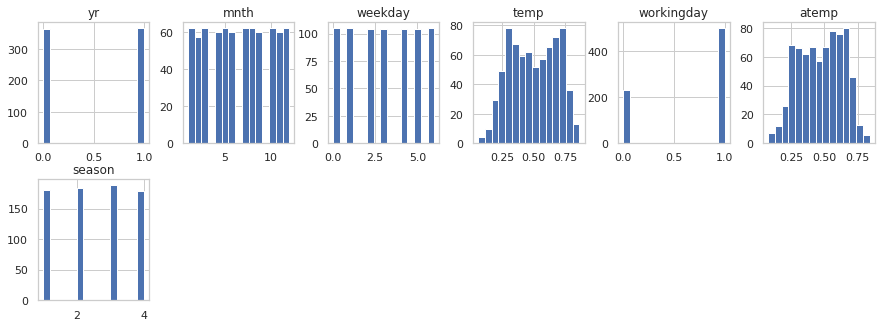

In [ ]:
show_distribution_of_data( df_bike , final_xcols)

 Plot  ['yr', 'mnth', 'weekday', 'temp', 'workingday', 'atemp', 'season'] of  size 7 in col: 2 and rows: 3


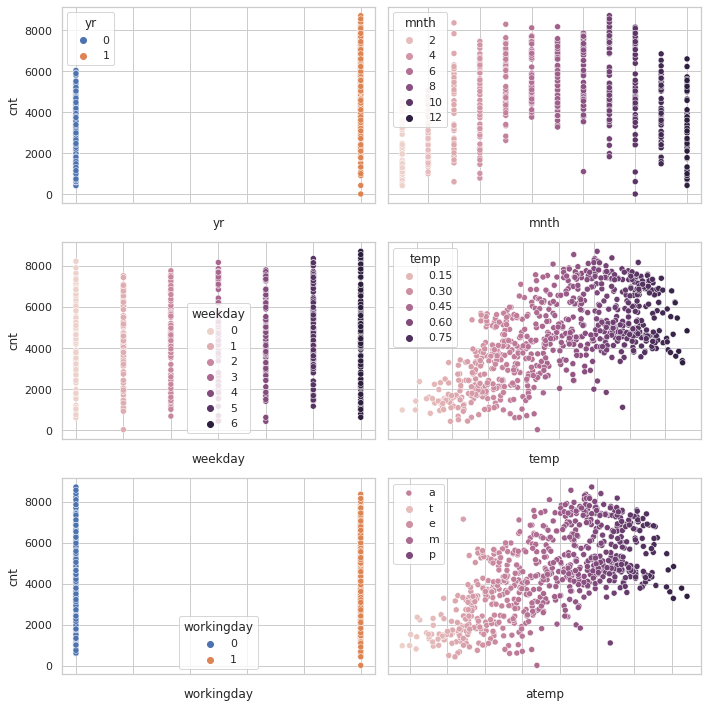

In [ ]:
plot_target_by_Variable( df_bike, final_xcols , y_cols[0])

#### Scaling of the data

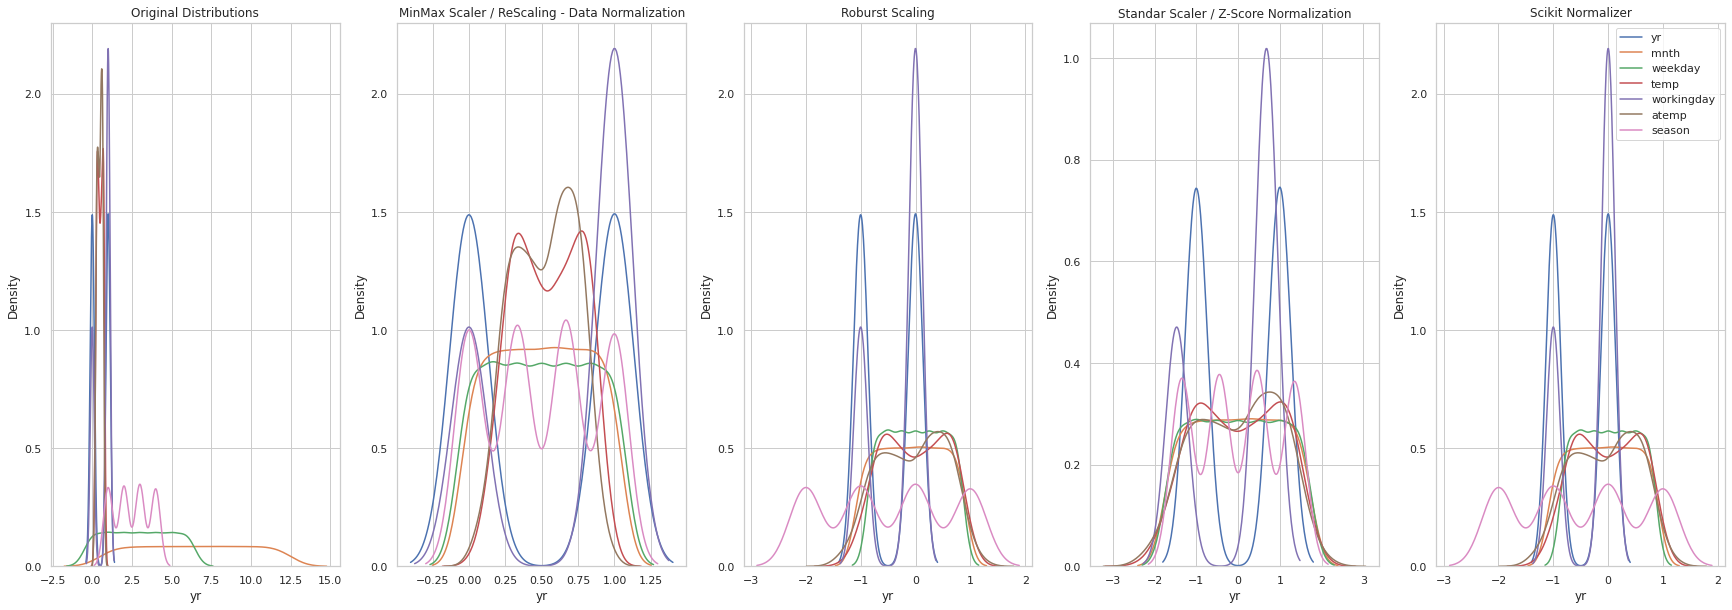

In [ ]:
df_copy2 = pd.DataFrame ( df_bike, columns=list(final_xcols))
##df_copy2.head()
Plot_Scalling_Variations ( df_copy2)

In [ ]:
## Based on the correlation matrix 
## Identify teh attributes influencing target

df = df_bike.drop(columns=['instant','season','yr','weathersit','casual','registered','mnth',  'weekday', 'workingday', 'temp','atemp', 'cnt'])

###Step4 - Feature Engineering

In [ ]:
target_variable = y_cols
feature_labels  = final_xcols

##df_filtered = pd.DataFrame ( df_HCV, columns=list(feature_labels))
##df_New = pd.DataFrame ( dset, columns=list(num_features))

X = pd.DataFrame ( df_bike, columns=list(feature_labels))
y = pd.DataFrame ( df_bike, columns=list(target_variable))
X, y

(     yr  mnth  weekday    temp  workingday   atemp  season
 0     0     1        6 0.34417           0 0.36362       1
 1     0     1        0 0.36348           0 0.35374       1
 2     0     1        1 0.19636           1 0.18940       1
 3     0     1        2 0.20000           1 0.21212       1
 4     0     1        3 0.22696           1 0.22927       1
 ..   ..   ...      ...     ...         ...     ...     ...
 726   1    12        4 0.25417           1 0.22664       1
 727   1    12        5 0.25333           1 0.25505       1
 728   1    12        6 0.25333           0 0.24240       1
 729   1    12        0 0.25583           0 0.23170       1
 730   1    12        1 0.21583           1 0.22349       1
 
 [731 rows x 7 columns],       cnt
 0     985
 1     801
 2    1349
 3    1562
 4    1600
 ..    ...
 726  2114
 727  3095
 728  1341
 729  1796
 730  2729
 
 [731 rows x 1 columns])

###Step5 - Run RF Regression Model

In [ ]:
print ( "features {0} \ntarget : {1}".format( feature_labels, target_variable))

x_train , x_test , y_train , y_test = train_test_split(X , y, test_size = 0.20, random_state = 42)
print( "Size of \nx_train :{}  y_train :{} \nx_test :{}  y_test :{}".format(  x_train.shape ,  y_train.shape , x_test.shape, y_test.shape )  )
Run_Model (x_train , y_train , x_test , y_test ,  X.columns, usescaling=False, modeltype='RFR',  bDebugPrint= True )

features ['yr', 'mnth', 'weekday', 'temp', 'workingday', 'atemp', 'season'] 
target : ['cnt']
Size of 
x_train :(584, 7)  y_train :(584, 1) 
x_test :(147, 7)  y_test :(147, 1)
Running ML Model 


Mean Absolute Error: 534.989387755102
Mean Squared Error: 790792.7249455781
Root Mean Squared Error: 889.2652725399649


('RFR', 0.9722897490357475, 0.802789042661665)

###Step6- Compare score from multiple models

In [ ]:
models = ['mnb', 'Logistic' , 'svm', 'RFR','nn', 'nb','KNN','XGB']
model_results = []
for model_name in models:
  mdl_results = Run_Model (x_train , y_train , x_test , y_test ,  X.columns, modeltype= model_name )
  model_results.append(mdl_results)
##print ( model_results)
df = pd.DataFrame(model_results, columns =['Algorithm', 'Training_Score', 'Testing_Score' ], index=None)   
print ("================= Scores of Algorithms ===================== \n\n")
df.head(10)

================= Scores of Algorithms ===================== 




,Algorithm,Training_Score,Testing_Score
0,mnb,0.04110,0.00000
1,Logistic,0.12500,0.00000
2,svm,0.02226,0.00000
3,RFR,0.97229,0.80279
4,nn,0.07877,0.00000
5,nb,0.95377,0.00000
6,KNN,0.17466,0.00000
7,XGB,0.32192,0.00000
